# Linear Classification and Gradient Descent

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from pylab import *
from sklearn.datasets import load_svmlight_file

In [67]:
#read data
x,y = load_svmlight_file("australian_scale")
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

(n,m) = x_train.shape
print("The demensin of x_train dataset is:",(n,m))

The demensin of x_train dataset is: (462, 14)


In [68]:
#initialize data
x_train = x_train.todense()
x_test = x_test.todense()
x_train = np.hstack((np.ones((n,1)),x_train))
x_test = np.hstack((np.ones((len(x_test),1)),x_test)) #add constant term row
y_train = y_train.reshape((n,1))
y_test = y_test.reshape((len(y_test),1))

#if labels are {0,1}
#idx = np.where(y_train =  = 0)
#y_train[idx] = -1

W = np.zeros((m+1,1)) #weights
loss_train = []
loss_test = []
MAX_LOOPS = 100000
cnt = 0
C = 0.001
learning_rate = 0.03

In [69]:
#Gradient Descent
while True:
    y_train_pred = x_train*W;  
    g = 1-np.multiply(y_train,y_train_pred)
    idx_1 = np.where(g>=0)[0]
    idx_2 = np.where(g<0)[0]
    deltaW_2 = -W.T    
    deltaW_1 = C*y_train.T*x_train+deltaW_2
    deltaW = learning_rate*((deltaW_1*len(deltaW_1)+deltaW_2*len(deltaW_2))/n)
    W = W+deltaW.T
    loss_train.append((np.linalg.norm(W))**2/2+C*sum(np.maximum(zeros((n,1)),g)))
    y_test_pred = x_test*W
    loss_test.append((np.linalg.norm(W))**2/2+C*sum(np.maximum(zeros((len(y_test),1)),1-np.multiply(y_test,y_test_pred))))
    if loss_train[-1]< 0.01 or cnt>MAX_LOOPS:
        break
    cnt = cnt+1

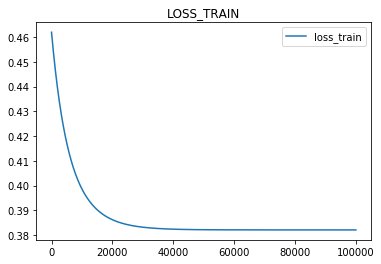

In [75]:
#loss plot
#p1 = plot(np.true_divide(loss_train,n),label='loss_train') #per sample
p1 = plot(loss_train[:],label='loss_train') #total
title("LOSS_TRAIN")
legend()
plt.show()

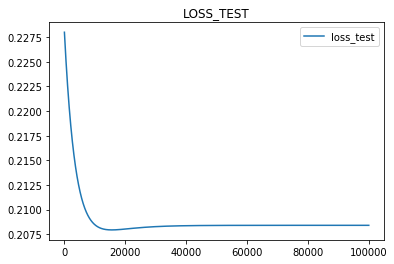

In [76]:
#p2 = plot(np.true_divide(loss_test,len(loss_test)),label='loss_test')
p1 = plot(loss_test[:],label='loss_test')
title("LOSS_TEST")
legend()
plt.show()

The number of samples in y_test: 192
The accuracy: 0.8421052631578947


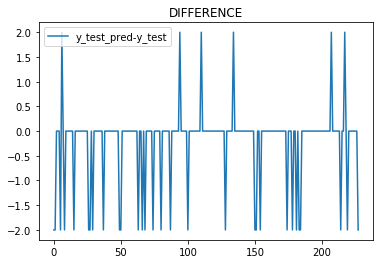

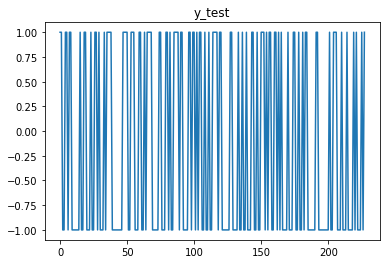

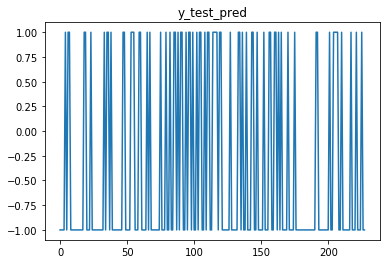

In [53]:
#test result plot
y_test_pred = x_test*W
idx_1 = np.where(y_test_pred>=0)
idx_2 = np.where(y_test_pred<0)
y_test_pred[idx_1] = +1
y_test_pred[idx_2] = -1

diff = y_test_pred-y_test
print("The number of samples in y_test:",len(np.where(diff==0)[0]))
right_percent = len(np.where(diff==0)[0])/len(diff)
print("The accuracy:",right_percent)
plot(diff,label='y_test_pred-y_test')
title("DIFFERENCE")
legend()
plt.show()

figure()
plot(y_test)
title("y_test")
plt.show()

figure()
plot(y_test_pred)
title("y_test_pred")
plt.show()

The number of samples in y_train: 385
The accuracy: 0.8333333333333334


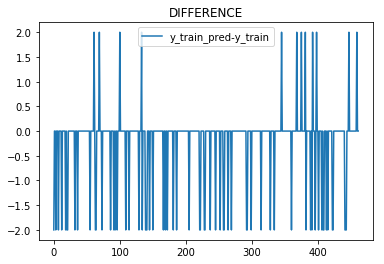

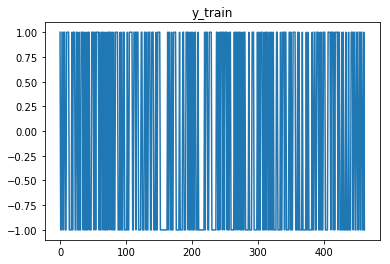

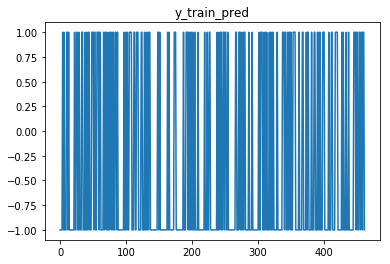

In [59]:
#train result plot
y_train_pred = x_train*W
idx_1 = np.where(y_train_pred>=0)
idx_2 = np.where(y_train_pred<0)
y_train_pred[idx_1] = +1
y_train_pred[idx_2] = -1

diff = y_train_pred-y_train
print("The number of samples in y_train:",len(np.where(diff==0)[0]))
right_percent = len(np.where(diff==0)[0])/len(diff)
print("The accuracy:",right_percent)
plot(diff,label='y_train_pred-y_train')
title("DIFFERENCE")
legend()
plt.show()

figure()
plot(y_train)
title("y_train")
plt.show()

figure()
plot(y_train_pred)
title("y_train_pred")
plt.show()

In [58]:
#ANOTHER TRY TO COMPUTE LOSS BUT FAILED
O  =  x_train*W;  
#loss.append((np.linalg.norm(W))**2/2+C*sum(max(zeros,1-y_train*O)))
print(np.maximum(zeros((n,1)),1-np.multiply(y_train,O)).shape)
sum(np.maximum(zeros((n,1)),1-np.multiply(y_train,O)))
idx = np.where(np.multiply(y_train,O)<1)[0]
e = O[idx]-y_train[idx]
np.dot(e.T,e).shape
cost = np.dot(e.T,e)+c*np.dot(W.T,W)


(462, 1)
